<h1>Tax cuts & Stock Market Instability</h1> 
<h3><center>Optimal Policy Term Paper</center></h3>

<center>Pau Belda-i-Tortosa</center>,


<center>January 2019</center>

<h3>Simulation of the model.</h3>

*This document contains the code of the simulation reported in the paper. 

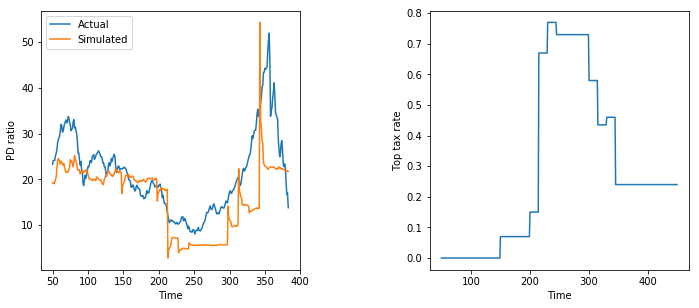

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

np.random.seed( 10 )
random.seed(10)

#Parameters
delta=0.999
sigma=5
a=1.0035
s_d=0.3
s_c=s_d/7
ρ=0.2
θ=0.25
λ0=0.5
λ1=0.15
λ2=0.15
λ3=0.1
λ4=0.1
λ5=0.0
λ6=0.0
λ7=0.0
λ8=0.0
U_PD=500
n=500

#True dgp for dividends:
log_eps_d=np.random.normal((-pow(s_d,2)/2),pow(s_d,2),n)
DG=np.zeros((n))
for i in range(n):
    DG[i]=a*np.exp(log_eps_d[i])

#True dgp for consumption
log_eps_c=np.random.normal((-pow(s_c,2)/2),pow(s_c,2),n)
cg=np.zeros((n))
for i in range(n):
    cg[i]=a*np.exp(log_eps_c[i])
    
#Price process learning: 
alpha=np.ones((n))*0.01
alpha[2]=1/50
for t in range(3,n):
    alpha[t]=alpha[t-1]+1

#Special beta's
beta_RE=pow(a,1-sigma)*np.exp(sigma*(1+sigma)*(s_c**2)/2)*np.exp(-sigma*ρ*s_c*s_d)
beta_R=pow(a,-sigma)*np.exp(sigma*(1+sigma)*(s_c**2)/2)

#Bounds for beta
beta_U = (U_PD- delta*a)/(U_PD*delta)
beta_L= pow(delta,-1) - 2*(pow(delta,-1) - beta_U)

# Weighting function for the projection facilities
def w(x):
    return beta_L + ((x-beta_L)/(x+beta_U-2*beta_L)*(beta_U - beta_L))


# Storage objects
beta=np.empty((n)) #vector to store beta's
beta[0]=beta_RE #we need two starting values for beta, to get the first price growth ratio. 
beta[1]=beta_RE
PG=np.empty((n)) #vector to store the rate of growth of prices
beta_pre=np.empty((n))

τ=np.zeros((n))
#1900-1920
for i in range(150,200):
    τ[i]=0.07

for i in range(200,215):
    τ[i]=0.15
    
for i in range(215,230):
    τ[i]=0.67
    
for i in range(230,245):
    τ[i]=0.77
for i in range(245,300):
    τ[i]=0.73
for i in range(300,315):
    τ[i]=0.58
for i in range(315,330):
    τ[i]=0.435
for i in range(330,345):
    τ[i]=0.46
for i in range(345,n):
    τ[i]=0.24
    
#Self referential process:
for t in range(1,n-8):
    PG[t]=(1 + (((delta*beta[t]*pow((1-(λ8*(τ[t-7]-τ[t-8])+ λ7*(τ[t-6]-τ[t-7])+ λ6*(τ[t-5]-τ[t-6])+λ5*(τ[t-4]-τ[t-5])+λ4*(τ[t-3]-τ[t-4])+λ3*(τ[t-2]-τ[t-3]) + λ2*(τ[t-1]-τ[t-2]) + λ1*(τ[t]-τ[t-1]) + λ0*(τ[t+1]-τ[t]))), θ)) - (delta*beta[t-1]*pow((1-(λ8*(τ[t-8]-τ[t-9])+λ7*(τ[t-7]-τ[t-8])+λ6*(τ[t-6]-τ[t-7])+λ5*(τ[t-5]-τ[t-6])+λ4*(τ[t-4]-τ[t-5])+λ3*(τ[t-3]-τ[t-4]) + λ2*(τ[t-2]-τ[t-3]) + λ1*(τ[t-1]-τ[t-2]) + λ0*(τ[t]-τ[t-1]))), θ)))/(1-(delta*pow((1-(λ8*(τ[t-7]-τ[t-8])+ λ7*(τ[t-6]-τ[t-7])+ λ6*(τ[t-5]-τ[t-6])+λ5*(τ[t-4]-τ[t-5])+λ4*(τ[t-3]-τ[t-4])+λ3*(τ[t-2]-τ[t-3]) + λ2*(τ[t-1]-τ[t-2]) + λ1*(τ[t]-τ[t-1]) + λ0*(τ[t+1]-τ[t]))), θ)*beta[t]))))*a*np.exp(log_eps_d[t])*((1-τ[t+1])/(1-τ[t]))                                               
    beta_pre[t+1]=beta[t]+((1/alpha[t+1])*((pow(cg[t],-sigma)*PG[t]/pow((1-(λ8*(τ[t-7]-τ[t-8])+ λ7*(τ[t-6]-τ[t-7])+ λ6*(τ[t-5]-τ[t-6])+λ5*(τ[t-4]-τ[t-5])+λ4*(τ[t-3]-τ[t-4])+λ3*(τ[t-2]-τ[t-3]) + λ2*(τ[t-1]-τ[t-2]) + λ1*(τ[t]-τ[t-1]) + λ0*(τ[t+1]-τ[t]))), θ))-beta[t]))
    if beta_pre[t+1]<=beta_L: #Projection facilities
        beta[t+1]=beta_pre[t+1]      
    else: 
        beta[t+1]=w(beta_pre[t+1])

#PD ratio:
pd=np.empty((n))
for t in range(1,n-8):
    pd[t]=(delta*beta_RE*(1-τ[t+1]))/(1-(delta*pow((1-(λ8*(τ[t-7]-τ[t-8])+ λ7*(τ[t-6]-τ[t-7])+ λ6*(τ[t-5]-τ[t-6])+λ5*(τ[t-4]-τ[t-5])+λ4*(τ[t-3]-τ[t-4])+λ3*(τ[t-2]-τ[t-3]) + λ2*(τ[t-1]-τ[t-2]) + λ1*(τ[t]-τ[t-1]) + λ0*(τ[t+1]-τ[t]))), θ)*beta[t]))
for t in range(0,n):
    if pd[t]<0:
        pd[t]=pd[t-1]

pd=pd[1:,]




#PLOT
import pandas as panda
data =panda.read_excel("20.xlsx")
real=data[['PD']]

time=np.linspace(0,499,500)
plt.figure
plt.subplots_adjust(top=0.9, bottom=0, left=0.5, right=2, wspace=0.5)

plt.subplot(121)
plt.plot(time[50:384],real[50:384],label='Actual')
plt.plot(time[50:384],pd[50:384], label='Simulated')
plt.xlabel('Time')
plt.ylabel('PD ratio')
plt.legend()

plt.subplot(122)
plt.plot(time[50:450],τ[50:450])
plt.xlabel('Time')
plt.ylabel('Top tax rate')
plt.show()

In [3]:
#Report statistics
E_PD= np.mean(pd[45:450])
ST_PD=np.std(pd[45:450])
CV_PD=ST_PD/E_PD
def autocorr(x, t=1):
    return np.corrcoef(np.array([x[0:len(x)-t], x[t:len(x)]]))

ac=autocorr(pd[45:450])

#Print them
print('Expectation of PD ratio:', "{0:.2f}".format(E_PD))
print('Volatility of PD ratio:',"{0:.2f}".format(ST_PD))
print('Relative volatility OF PD ratio:', "{0:.2f}".format(CV_PD))
print('Persistence of PD ratio:', "{0:.2f}".format(ac[0,1]))

Expectation of PD ratio: 17.10
Volatility of PD ratio: 6.94
Relative volatility OF PD ratio: 0.41
Persistence of PD ratio: 0.92
